# LDA


LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities

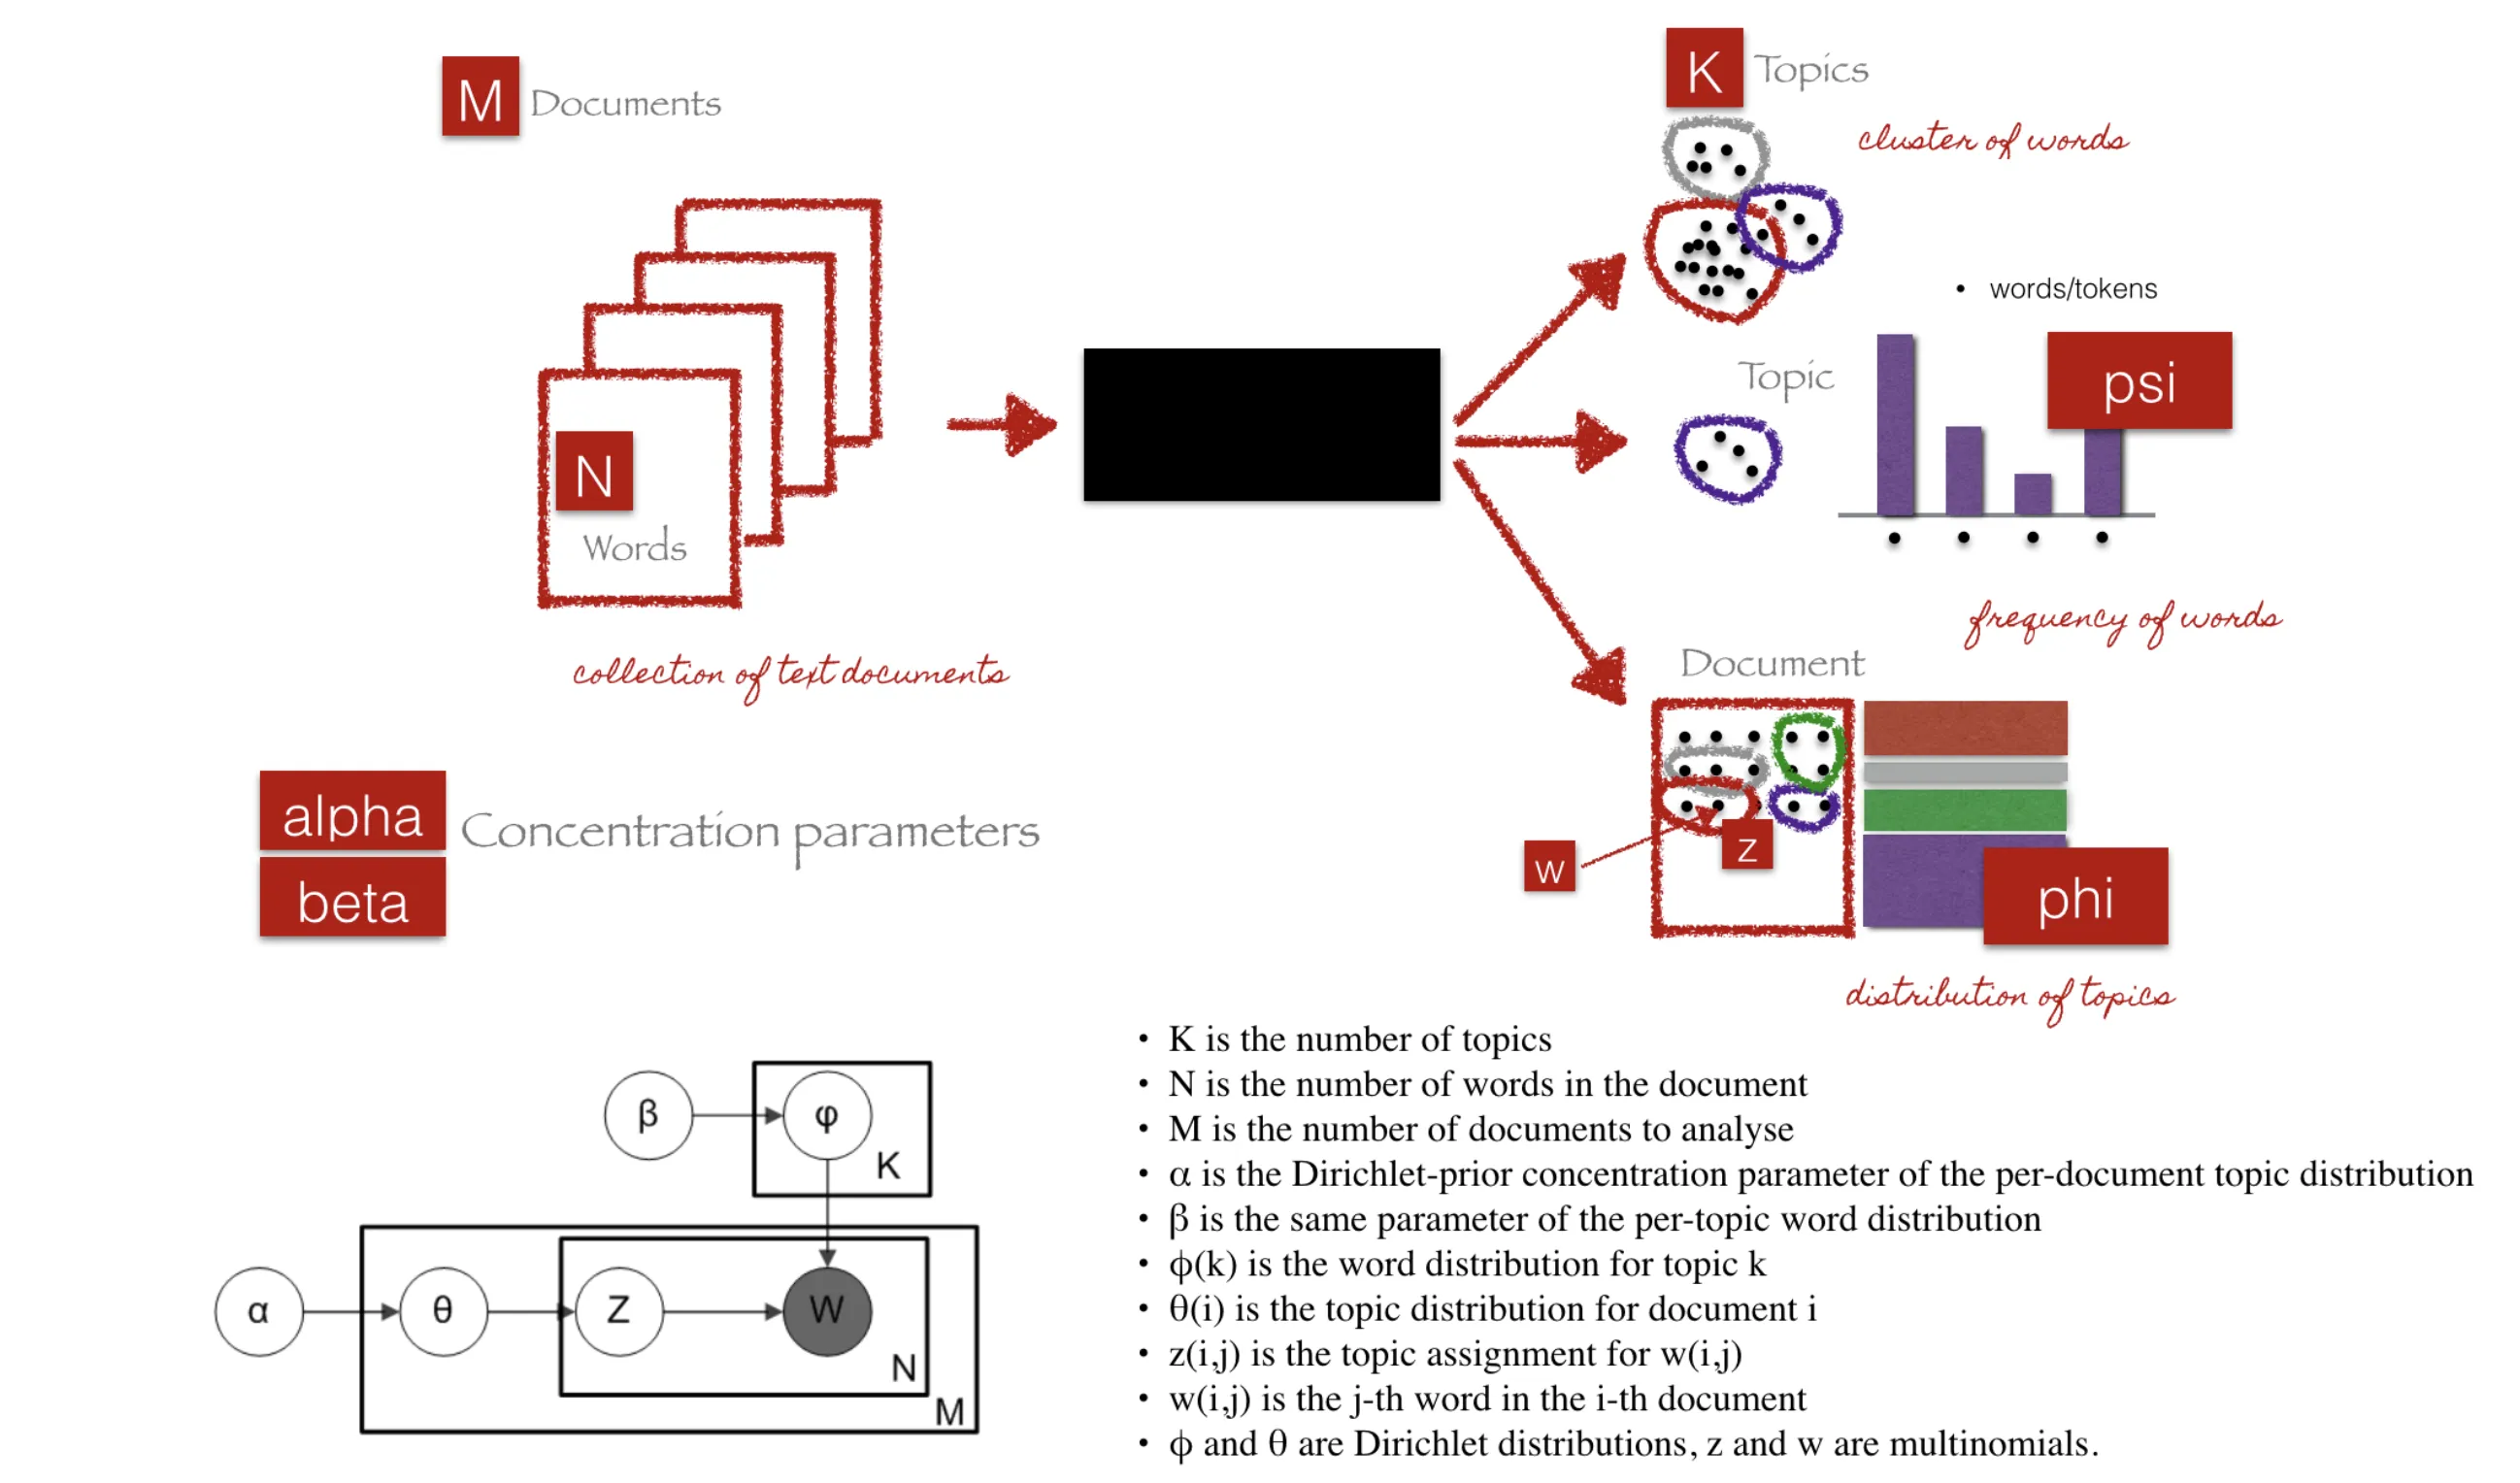

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

$\psi$ (psi) the distribution of words for each topic $K$

$\phi$ (phi) the distribution of topics for each document $i$

## Data preperation

### Reading Data from CSV

In [4]:
import pandas as pd

csv_file = "../../data/arxiv_processed.csv"
data = pd.read_csv(csv_file, sep=";")

In [5]:
data = data.drop(columns=['ID', 'PDF Link'], axis=1)
data['Processed Summary'] = data['Processed Summary'].apply(eval)
data.head()

Title  \
0  Uniform semantic treatment of default and auto...   
1           On the accuracy and running time of GSAT   
2  Syntactic Autonomy: Why There is no Autonomy w...   
3  Consistency Management of Normal Logic Program...   
4  Abductive and Consistency-Based Diagnosis Revi...   

                                             Summary             Published  \
0  We revisit the issue of connections between tw...  2000-02-03T21:44:57Z   
1  Randomized algorithms for deciding satisfiabil...  2000-02-04T12:53:57Z   
2  Two different types of agency are discussed ba...  2000-02-16T18:09:20Z   
3  This paper presents a method of computing a re...  2000-03-05T10:29:03Z   
4  Diagnostic reasoning has been characterized lo...  2000-03-07T11:39:53Z   

                                   Processed Summary  
0  [revisit, issue, connection, two, leading, for...  
1  [randomized, algorithm, deciding, satisfiabili...  
2  [two, different, type, agency, discussed, base...  
3  [paper, present, method, computing, revision, ...  
4  [diagnostic, reasoning, characterized, logical...

### Prepare text for LDA analysis

In [7]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data['Processed Summary'])
# Create a Bag-of-Words (BoW) representation for each document
corpus = [id2word.doc2bow(doc) for doc in data['Processed Summary']]
# View
# If a document contains the word "data" three times and "science" once, the doc2bow output might look like [(0, 3), (1, 1)], where 0 and 1 are IDs for "data" and "science," respectively
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 4), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 5), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


### LDA - gensim

#### Model training

In [53]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.6 MB/s eta 0:00:00


In [54]:
from pprint import pprint
import gensim

# number of topics
num_topics = 70

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 70 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(47,
  '0.035*"video" + 0.029*"model" + 0.015*"pruning" + 0.013*"learning" + '
  '0.011*"performance" + 0.010*"method" + 0.010*"strategy" + 0.008*"training" '
  '+ 0.006*"quality" + 0.006*"computational"'),
 (15,
  '0.054*"policy" + 0.039*"learning" + 0.024*"reinforcement" + 0.021*"rl" + '
  '0.018*"algorithm" + 0.015*"offline" + 0.015*"environment" + 0.013*"method" '
  '+ 0.009*"approach" + 0.009*"agent"'),
 (32,
  '0.034*"quantization" + 0.023*"n" + 0.011*"memory" + 0.010*"td" + '
  '0.010*"learning" + 0.009*"arabic" + 0.009*"function" + 0.009*"method" + '
  '0.007*"foreground" + 0.007*"divergence"'),
 (26,
  '0.022*"method" + 0.019*"traffic" + 0.013*"learning" + 0.011*"network" + '
  '0.008*"proposed" + 0.008*"performance" + 0.008*"trajectory" + 0.008*"data" '
  '+ 0.008*"road" + 0.007*"model"'),
 (17,
  '0.040*"space" + 0.027*"state" + 0.021*"model" + 0.016*"color" + '
  '0.011*"method" + 0.010*"transition" + 0.009*"data" + 0.008*"transformation" '
  '+ 0.008*"perplexity" + 0.007*

#### Analyzing model

In [55]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
27    -0.075393 -0.108202       1        1  4.715800
9      0.029400 -0.081222       2        1  4.127498
30    -0.140461 -0.009920       3        1  3.484745
62     0.061162  0.057107       4        1  3.442447
69     0.024736 -0.112782       5        1  2.941277
...         ...       ...     ...      ...       ...
39    -0.056679  0.015048      66        1  0.405359
12     0.027506  0.035415      67        1  0.384184
68    -0.009334  0.059006      68        1  0.363212
5     -0.028230  0.093863      69        1  0.294737
51    -0.009760  0.050121      70        1  0.290426

[70 rows x 5 columns], topic_info=           Term          Freq         Total Category  logprob  loglift
2116      image  11413.000000  11413.000000  Default  30.0000  30.0000
100       graph  12329.000000  12329.000000  Default  29.0000  29.0000
10243    prompt   5238.000000   5238.000000  Default  28.0000  28.0000
214       model  64030.000000  64030.000000  Default  27.0000  27.0000
697          ai   9764.000000   9764.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
182     propose     55.673327  15107.320147  Topic70  -5.2463   0.2381
5         based     52.881135  10997.858472  Topic70  -5.2978   0.5042
211      method     50.678616  33873.889778  Topic70  -5.3403  -0.6633
384    approach     47.374261  21237.182838  Topic70  -5.4078  -0.2639
74         term     39.857698   3067.962935  Topic70  -5.5805   1.4981

[5188 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
17514     26  0.881762  100x
16585     59  0.872196   103
17184     58  0.950903   105
15729     26  0.953809   120
15986     34  0.867912   137
...      ...       ...   ...
1889      28  0.935079     z
16524     21  0.028444   zsl
16524     28  0.113776   zsl
16524     29  0.028444   zsl
16524     55  0.767986   zsl

[47200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 10, 31, 63, 70, 25, 23, 39, 59, 14, 16, 41, 30, 36, 11, 42, 64, 45, 8, 7, 21, 46, 29, 51, 37, 32, 1, 20, 67, 3, 58, 22, 27, 61, 35, 5, 43, 66, 4, 15, 12, 2, 50, 56, 49, 44, 65, 18, 68, 19, 24, 48, 55, 57, 54, 17, 33, 34, 60, 38, 47, 9, 53, 26, 62, 40, 13, 69, 6, 52])

List of terms associated with a selected topic represent the most significant words within it, giving a sense of what the it is about.
Each topic shows a list of words ranked by their importance.
*   When λ is close to 1, the terms are ranked by frequency within the topic. This shows the most commonly occurring words within the topic.
*   When λ is close to 0, the terms are ranked by exclusivity, meaning they are more unique or specific to the topic.

The Intertopic Distance Plot is a two-dimensional visualization showing how different topics relate to each other within the broader document collection. Each topic is represented as a circle, with the size of the circle indicating its relative prevalence (importance or size).
The distance between circles represents the similarity or relationship between topics.

### LDA - sklearn

#### Model training, with grid search

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

vectorizer = CountVectorizer()
documents = [' '.join(doc) for doc in data['Processed Summary']]
data_vectorized = vectorizer.fit_transform(documents)

search_params = {'n_components': [55, 60, 65, 70, 75], 'learning_decay': [0.5, 0.7, 0.9]}
lda = LatentDirichletAllocation(n_components=55, random_state=42)
lda = GridSearchCV(lda, param_grid=search_params)

lda.fit(data_vectorized)

# Print the top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])


Topic 0:
['point', 'space', 'method', 'search', 'optimization']
Topic 1:
['layer', 'architecture', 'deep', 'neural', 'network']
Topic 2:
['architecture', 'accuracy', 'transformer', 'model', 'memory']
Topic 3:
['knowledge', 'set', 'system', 'reasoning', 'logic']
Topic 4:
['transformer', 'method', 'task', 'model', 'video']
Topic 5:
['ensemble', 'teacher', 'distillation', 'knowledge', 'model']
Topic 6:
['narrative', 'story', 'character', 'description', 'text']
Topic 7:
['segmentation', 'feature', 'method', 'model', 'image']
Topic 8:
['function', 'operator', 'property', 'measure', 'uncertainty']
Topic 9:
['function', 'algorithm', 'reward', 'learning', 'policy']
Topic 10:
['playing', 'strategy', 'player', 'event', 'game']
Topic 11:
['task', 'language', 'composition', 'text', 'test']
Topic 12:
['model', 'belief', 'algorithm', 'constraint', 'problem']
Topic 13:
['model', 'kg', 'graph', 'entity', 'knowledge']
Topic 14:
['detection', 'visual', '3d', 'image', 'object']
Topic 15:
['review', 'appl

#### Analyzing model

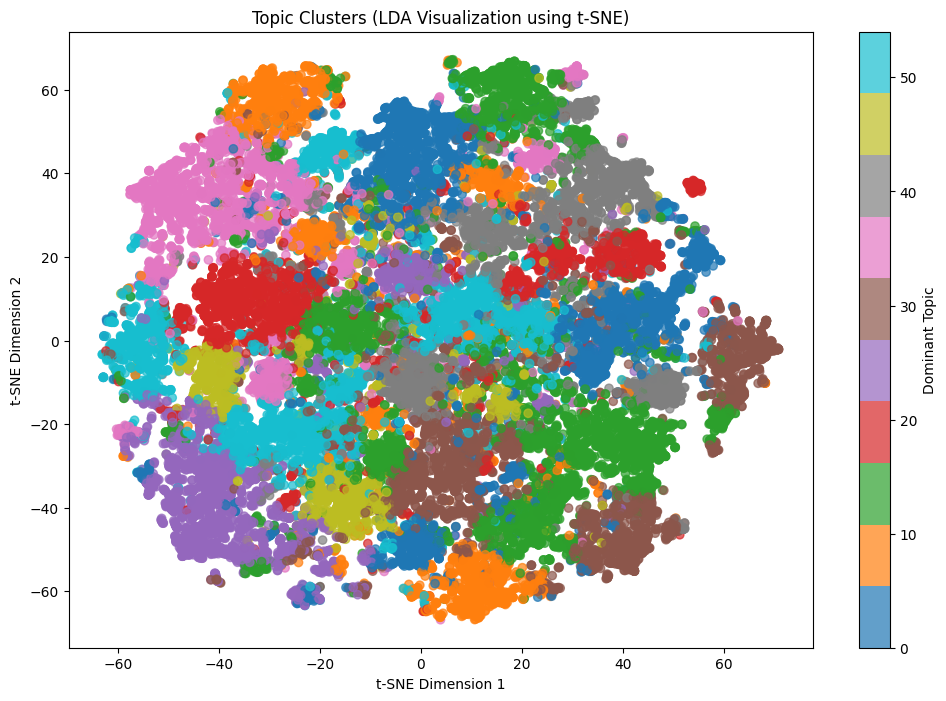

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

best_lda_model = model.best_estimator_
topic_distribution = best_lda_model.transform(data_vectorized)
tsne_values = tsne_model.fit_transform(topic_distribution)

# Assign a dominant topic to each document
dominant_topics = np.argmax(topic_distribution, axis=1)

# Scatter plot with color corresponding to dominant topics
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_values[:, 0], tsne_values[:, 1], c=dominant_topics, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Dominant Topic')
plt.title("Topic Clusters (LDA Visualization using t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


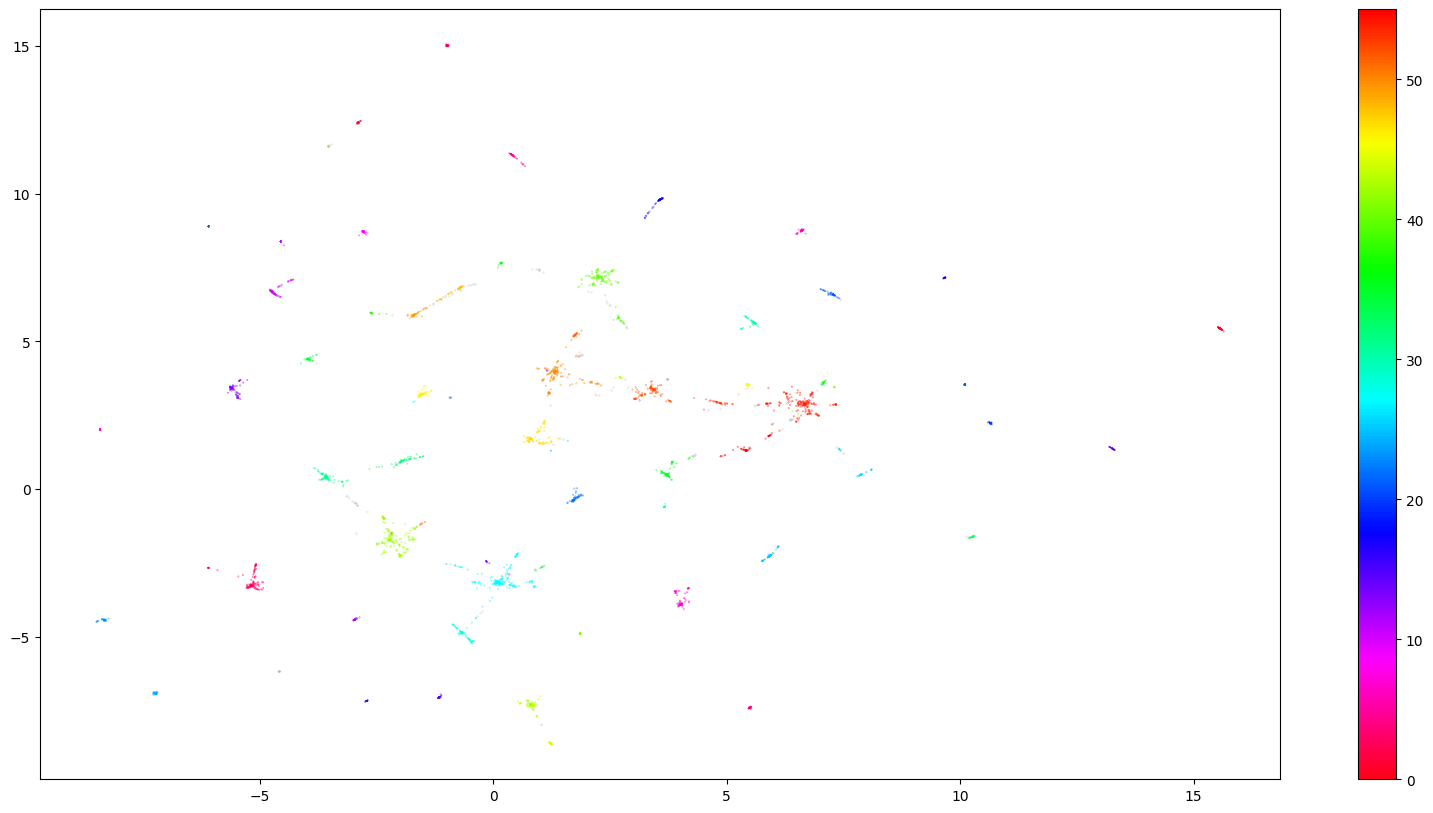

In [ ]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
import hdbscan

best_lda_model = model.best_estimator_
topic_distribution = best_lda_model.transform(data_vectorized)

umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine')
topic_embeddings = umap_model.fit_transform(topic_distribution)
cluster = hdbscan.HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom').fit(topic_embeddings)

umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_distribution)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [ ]:
number_of_clusters = max(set(cluster.labels_))
print(f"Number of clusters: {number_of_clusters}")

Number of clusters: 55


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Topics by date

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [ ]:
vectorizer = CountVectorizer()
documents = [' '.join(doc) for doc in data['Processed Summary']]
data_vectorized = vectorizer.fit_transform(documents)

lda = LatentDirichletAllocation(n_components=50)

lda.fit(data_vectorized)

LatentDirichletAllocation(n_components=50)

In [ ]:
topic_distribution = lda.transform(data_vectorized)

# Assign most relevant topic index to each document
data['Topic'] = np.argmax(topic_distribution, axis=1)

In [14]:
data.head()

Title  \
0  Uniform semantic treatment of default and auto...   
1           On the accuracy and running time of GSAT   
2  Syntactic Autonomy: Why There is no Autonomy w...   
3  Consistency Management of Normal Logic Program...   
4  Abductive and Consistency-Based Diagnosis Revi...   

                                             Summary             Published  \
0  We revisit the issue of connections between tw...  2000-02-03T21:44:57Z   
1  Randomized algorithms for deciding satisfiabil...  2000-02-04T12:53:57Z   
2  Two different types of agency are discussed ba...  2000-02-16T18:09:20Z   
3  This paper presents a method of computing a re...  2000-03-05T10:29:03Z   
4  Diagnostic reasoning has been characterized lo...  2000-03-07T11:39:53Z   

                                   Processed Summary  Topic  
0  [revisit, issue, connection, two, leading, for...      1  
1  [randomized, algorithm, deciding, satisfiabili...     43  
2  [two, different, type, agency, discussed, base...      8  
3  [paper, present, method, computing, revision, ...      1  
4  [diagnostic, reasoning, characterized, logical...     40

<Axes: xlabel='Year'>

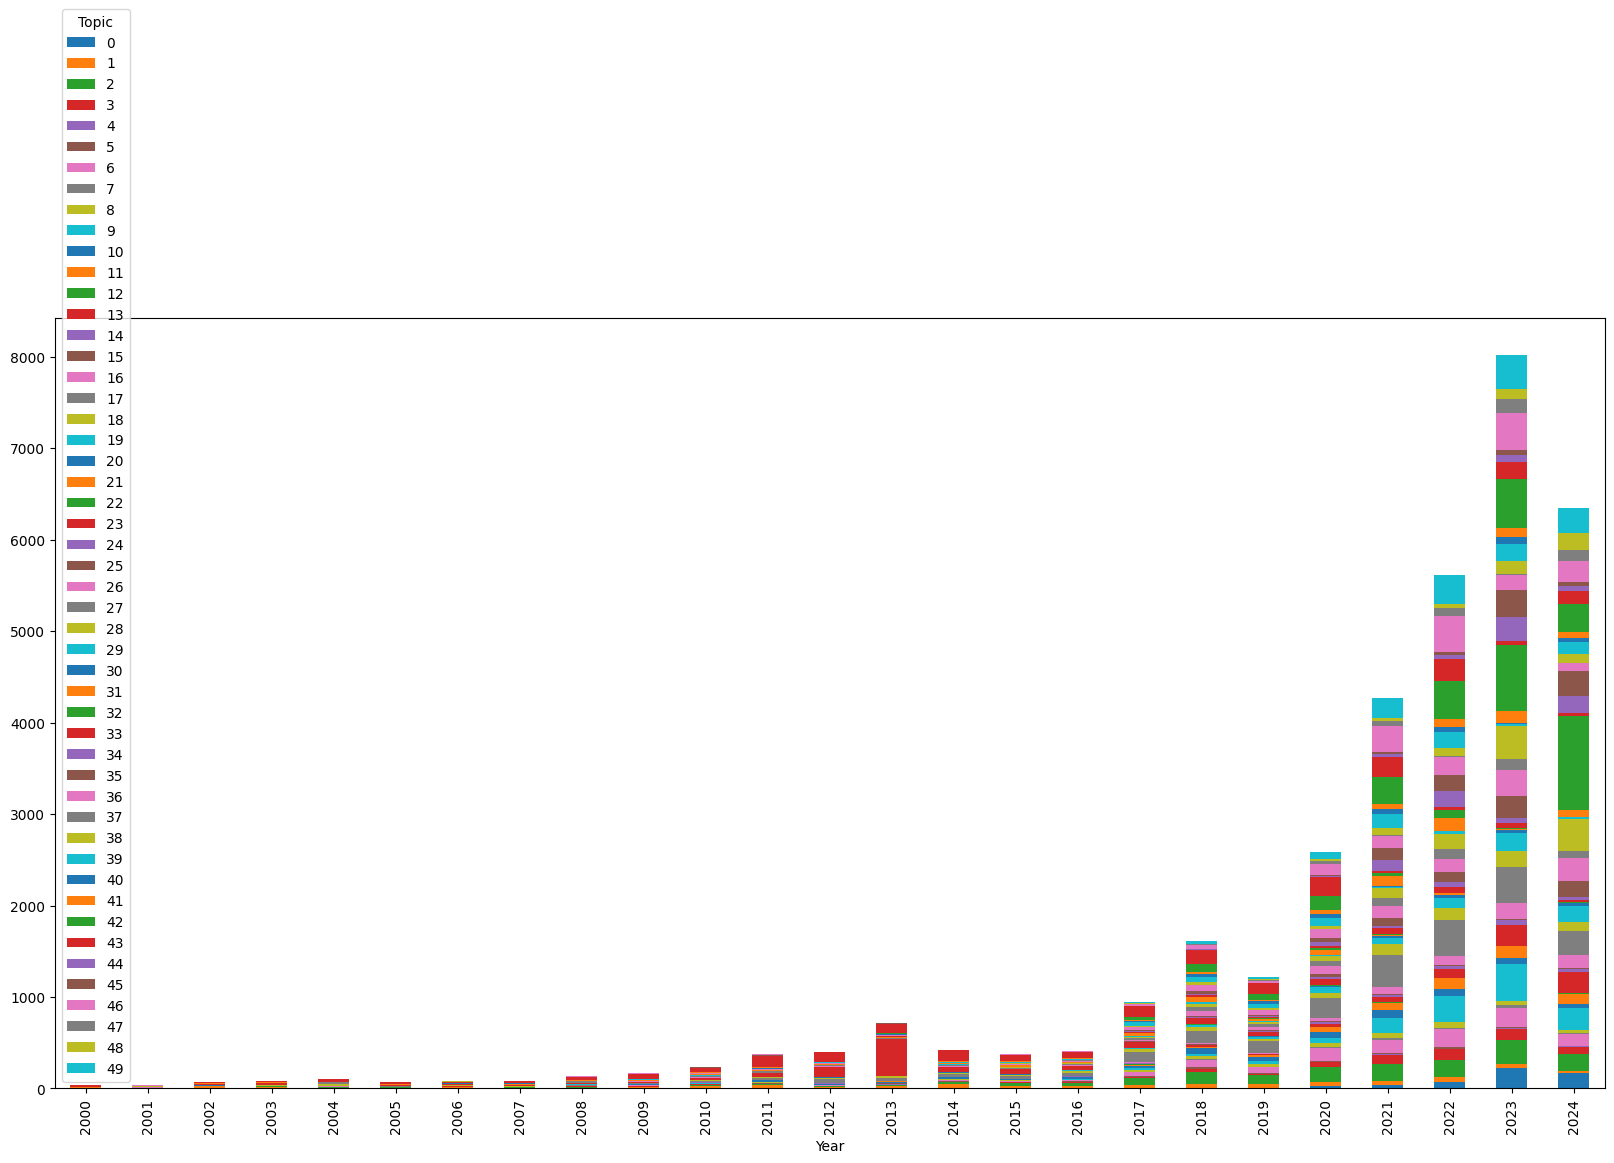

In [15]:
data['Year'] = pd.to_datetime(data['Published']).dt.year
topic_trend = data.groupby(['Year', 'Topic']).size().reset_index(name='Count')
topic_trend.head()
topic_trend_pivot = topic_trend.pivot(index='Year', columns='Topic', values='Count').fillna(0)
topic_trend_pivot.plot(kind='bar', stacked=True, figsize=(20, 10))

In [18]:
lda2 = LatentDirichletAllocation(n_components=25)

lda2.fit(data_vectorized)

LatentDirichletAllocation(n_components=25)

<Axes: xlabel='Year'>

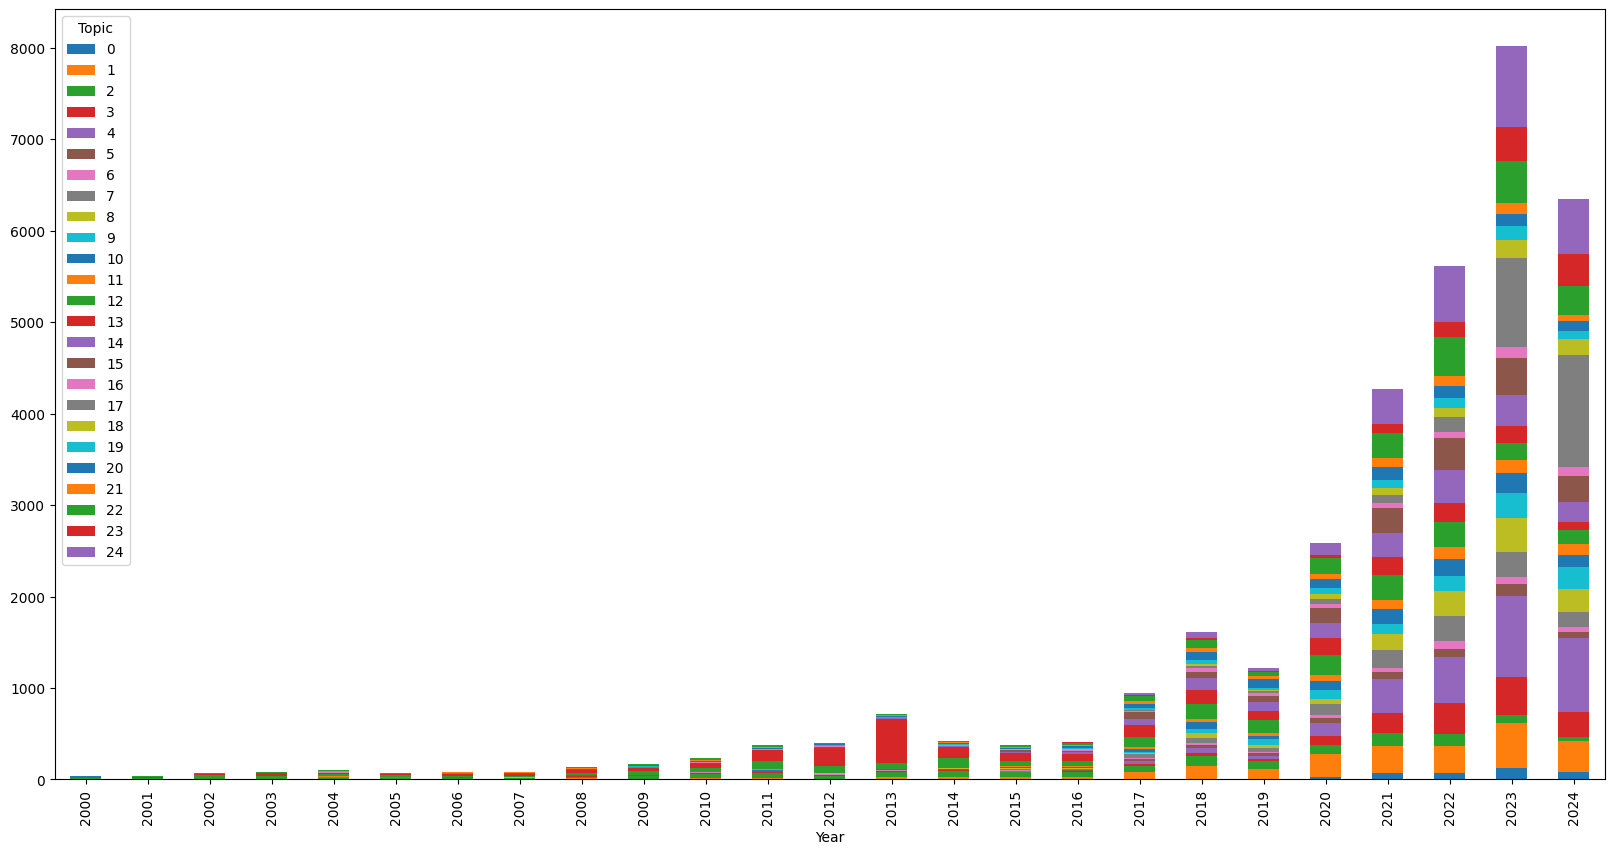

In [19]:
topic_distribution2 = lda2.transform(data_vectorized)

# Assign most relevant topic index to each document
data['Topic'] = np.argmax(topic_distribution2, axis=1)
topic_trend = data.groupby(['Year', 'Topic']).size().reset_index(name='Count')
topic_trend.head()
topic_trend_pivot = topic_trend.pivot(index='Year', columns='Topic', values='Count').fillna(0)
topic_trend_pivot.plot(kind='bar', stacked=True, figsize=(20, 10))

#### Metrics calculation

In [1]:
from octis.dataset.dataset import Dataset
import pandas as pd
from IPython.display import display, Markdown
from octis.models.LDA import LDA
import sys
sys.path.append('../bertopic')
from utils import *


In [2]:
dataset = Dataset()
dataset.load_custom_dataset_from_folder("../../data/octis")

In [ ]:
model = LDA(num_topics=70)  # Create model
model_output = model.train_model(dataset) # Train the model
lda_metrics = calculate_metrics(model_output, dataset)

In [ ]:
metrics_df = pd.DataFrame(list(lda_metrics.items()), columns=['Metric', 'Value'])
display(Markdown('## LDA Metrics'))
metrics_df.style.set_properties(subset=['Metric'], **{'width': '250px'}).set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightgray'), ('text-align', 'center')]},
     {'selector': 'tbody td', 'props': [('text-align', 'center')]},
     {'selector': 'table', 'props': [('width', '50%'), ('margin-left', 'auto'), ('margin-right', 'auto')]}]
)

## LDA Metrics

In [ ]:
num_topics_list = [70, 90, 110]
alpha_values = [0.01, 0.1, 0.5]
decay_values = [0.6, 0.7, 0.8]

results = []

for num_topics in num_topics_list:
    for alpha in alpha_values:
        for decay in decay_values:
            print(f"Training LDA model with {num_topics} topics, alpha={alpha}, decay={decay}")
            model = LDA(num_topics=num_topics, alpha=alpha, decay=decay)
            
            model_output = model.train_model(dataset)
            
            lda_metrics = calculate_metrics(model_output, dataset)
            print("\n", lda_metrics, "\n")
            
            metrics = lda_metrics.copy()
            metrics['Num Topics'] = num_topics
            metrics['Alpha'] = alpha
            metrics['Decay'] = decay
            results.append(metrics)

metrics_df = pd.DataFrame(results)

Training LDA model with 70 topics, alpha=0.01, decay=0.6

 {'UMass': -4.528728249729414, 'NPMI': -0.05013617982743639, 'C_V': 0.39141562108517886, 'Topic Diversity': 0.8057142857142857, 'Inverted RBO': 0.9880789363795711, 'Pairwise Jaccard': 0.00884799381232281, 'KL Uniform': 4.123429988217438, 'KL Vacuous': 1.9095924384418035, 'KL Background': 1.522093196067086} 

Training LDA model with 70 topics, alpha=0.01, decay=0.7

 {'UMass': -4.0057860003925745, 'NPMI': -0.043214116276351126, 'C_V': 0.37689302359771504, 'Topic Diversity': 0.7471428571428571, 'Inverted RBO': 0.977313028748672, 'Pairwise Jaccard': 0.01943335177956281, 'KL Uniform': 3.987329296759922, 'KL Vacuous': 1.728822615689034, 'KL Background': 1.5918959268120452} 

Training LDA model with 70 topics, alpha=0.01, decay=0.8

 {'UMass': -3.8200542462158693, 'NPMI': -0.03688250718763734, 'C_V': 0.38492190095389966, 'Topic Diversity': 0.72, 'Inverted RBO': 0.9675915228406684, 'Pairwise Jaccard': 0.025100759856447465, 'KL Uniform'

In [31]:
metrics_df

UMass      NPMI       C_V  Topic Diversity  Inverted RBO  \
0  -4.528728 -0.050136  0.391416         0.805714      0.988079   
1  -4.005786 -0.043214  0.376893         0.747143      0.977313   
2  -3.820054 -0.036883  0.384922         0.720000      0.967592   
3  -4.324528 -0.043788  0.395683         0.788571      0.983863   
4  -3.933556 -0.040494  0.384147         0.748571      0.979165   
5  -3.858108 -0.038733  0.377909         0.717143      0.969407   
6  -3.324560 -0.008391  0.405076         0.731429      0.947859   
7  -3.308001 -0.014098  0.407272         0.695714      0.946605   
8  -3.464343 -0.031165  0.374197         0.655714      0.903707   
9  -4.789580 -0.071288  0.382767         0.811111      0.990708   
10 -4.226098 -0.052724  0.388207         0.751111      0.979240   
11 -4.223160 -0.054984  0.373731         0.741111      0.975171   
12 -4.705420 -0.064335  0.370875         0.802222      0.986805   
13 -4.091459 -0.046476  0.374602         0.771111      0.978154   
14 -4.075038 -0.041285  0.393926         0.736667      0.981145   
15 -3.702673 -0.032413  0.387227         0.732222      0.954549   
16 -3.782270 -0.041737  0.366983         0.680000      0.912058   
17 -3.443993 -0.033836  0.367369         0.616667      0.893116   
18 -4.741669 -0.070283  0.375053         0.790000      0.986167   
19 -4.910865 -0.079027  0.360467         0.798182      0.987368   
20 -4.457016 -0.061005  0.371460         0.744545      0.978889   
21 -4.800228 -0.072900  0.365437         0.833636      0.993338   
22 -4.897436 -0.077144  0.367591         0.795455      0.990863   
23 -4.664659 -0.071094  0.360598         0.776364      0.983483   
24 -3.523620 -0.032142  0.380559         0.695455      0.921102   
25 -3.517797 -0.032074  0.384432         0.630000      0.924106   
26 -3.297161 -0.029445  0.371341         0.583636      0.862633   

    Pairwise Jaccard  KL Uniform  KL Vacuous  KL Background  Num Topics  \
0           0.008848    4.123430    1.909592       1.522093          70   
1           0.019433    3.987329    1.728823       1.591896          70   
2           0.025101    3.828387    1.538433       1.653985          70   
3           0.012514    4.190193    1.933796       1.221473          70   
4           0.016479    4.022750    1.725598       1.287725          70   
5           0.024364    3.797927    1.503495       1.336693          70   
6           0.041381    3.893062    1.388575       0.571172          70   
7           0.045886    3.716162    1.202624       0.586405          70   
8           0.067590    3.448562    0.984751       0.561246          70   
9           0.008199    4.360317    2.160416       1.599854          90   
10          0.017829    4.160532    1.864965       1.652044          90   
11          0.020638    3.992151    1.700714       1.710297          90   
12          0.010061    4.381353    2.126696       1.199715          90   
13          0.018148    4.213884    1.928942       1.266929          90   
14          0.016157    4.044909    1.717067       1.328989          90   
15          0.042809    3.986430    1.463180       0.514146          90   
16          0.069127    3.718265    1.199262       0.502521          90   
17          0.085243    3.492105    0.979454       0.494973          90   
18          0.011897    4.545906    2.292914       1.613387         110   
19          0.010504    4.385847    2.177208       1.707375         110   
20          0.017162    4.136867    1.860516       1.793905         110   
21          0.005878    4.632843    2.378788       1.186627         110   
22          0.007743    4.407732    2.144999       1.252149         110   
23          0.015494    4.198845    1.940485       1.316435         110   
24          0.060654    4.003126    1.408888       0.453329         110   
25          0.070844    3.696562    1.140252       0.452540         110   
26          0.101375    3.511815    0.941993       0.442393         110   

    Alpha  Beta  
0    0.01  

In [ ]:
num_topics_list = [25, 50, 100]
results = []

for num_topics in num_topics_list:
    print(f"Training LDA model with {num_topics} topics")
    model = LDA(num_topics=num_topics)
    
    model_output = model.train_model(dataset)
    
    lda_metrics = calculate_metrics(model_output, dataset)
    print("\n", lda_metrics, "\n")
    
    metrics = lda_metrics.copy()
    metrics['Num Topics'] = num_topics
    results.append(metrics)

metrics_df = pd.DataFrame(results)

Training LDA model with 25 topics

 {'UMass': -3.5431819192439487, 'NPMI': -0.0034682273305817884, 'C_V': 0.43440138266930367, 'Topic Diversity': 0.796, 'Inverted RBO': 0.959700153411, 'Pairwise Jaccard': 0.02539457303389188, 'KL Uniform': 3.604476150357803, 'KL Vacuous': 1.3167819002461298, 'KL Background': 1.1490334366400268} 

Training LDA model with 50 topics

 {'UMass': -3.2214728464018134, 'NPMI': -0.0016895923626272442, 'C_V': 0.43343620548881406, 'Topic Diversity': 0.762, 'Inverted RBO': 0.9794945304538833, 'Pairwise Jaccard': 0.015720463624046107, 'KL Uniform': 4.040515093163545, 'KL Vacuous': 1.662221667582759, 'KL Background': 1.3163741018096244} 

Training LDA model with 100 topics

 {'UMass': -4.848661842571636, 'NPMI': -0.06867255751094595, 'C_V': 0.3756843407190329, 'Topic Diversity': 0.822, 'Inverted RBO': 0.9904489696811039, 'Pairwise Jaccard': 0.007647753767464888, 'KL Uniform': 4.684770190373441, 'KL Vacuous': 2.4881867004152194, 'KL Background': 1.5424059145495237} 

In [ ]:
metrics_df

UMass      NPMI       C_V  Topic Diversity  Inverted RBO  \
0 -3.543182 -0.003468  0.434401            0.796      0.959700   
1 -3.221473 -0.001690  0.433436            0.762      0.979495   
2 -4.848662 -0.068673  0.375684            0.822      0.990449   

   Pairwise Jaccard  KL Uniform  KL Vacuous  KL Background  Num Topics  
0          0.025395    3.604476    1.316782       1.149033          25  
1          0.015720    4.040515    1.662222       1.316374          50  
2          0.007648    4.684770    2.488187       1.542406         100

In [3]:
from custom_lda import Custom_LDA

model = Custom_LDA(50)
lda_metrics = model.train_with_metrics_calculation(dataset)
lda_metrics

model name    UMass      NPMI       C_V  Topic Diversity  Inverted RBO  \
0   LDA - 50 -3.81912 -0.019719  0.421998            0.778      0.974524   

   Pairwise Jaccard  KL Uniform  KL Vacuous  KL Background  
0          0.017152    4.079468    1.787258       1.333271